**PRACTICAL NO 7 : Logistic Regression and Decision Tree**
*   **Build a logistic regression model to predict a binary outcome.**
*   Evaluate the model's performance using classification metrics (e g., accuracy,precision, recall)
*   **Construct a decision tree model and interpret the decision rules for classification.**

## ***Logistic Regression***


Data Head:
     Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0   

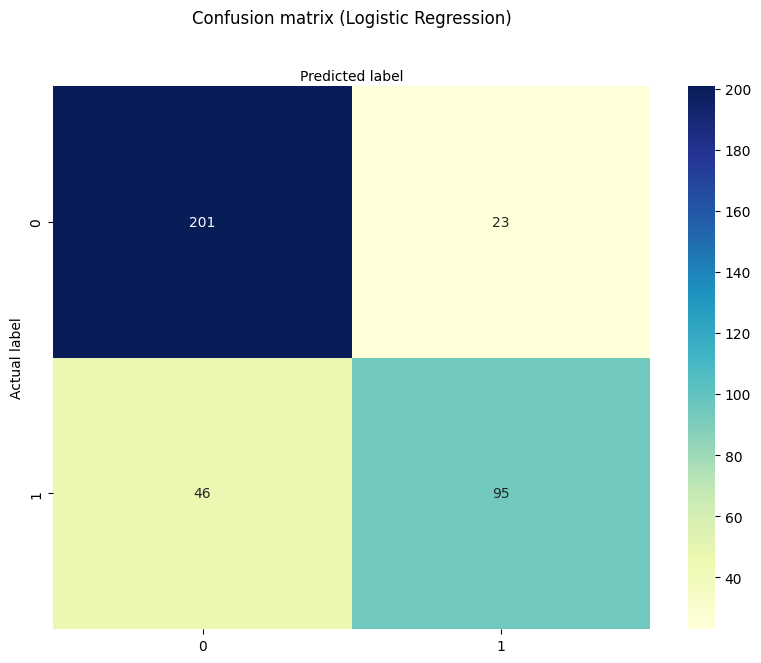


--- Model Evaluation Metrics ---
Accuracy: 0.810958904109589
Precision: 0.8050847457627118
Recall: 0.6737588652482269

ROC AUC Score:  0.8851000506585613


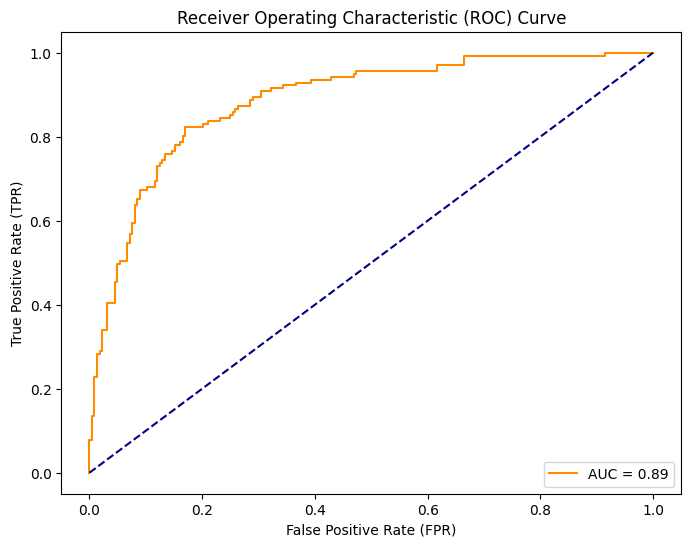

In [3]:
# --- 1. Loading Libraries and Data ---
from matplotlib.pylab import shape
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import math

df = pd.read_csv(r'/content/test.csv')
print("\nData Head:")
print(df.head())
print("Shape of the DataFrame:", df.shape)
# --- 2. Selecting Features and Target ---
# Define target: Create a binary classification target based on Overall Quality
df['High_Quality'] = (df['OverallQual'] >= 7).astype(int)

# Define feature columns
feature_cols = ['GrLivArea', 'LotArea', 'TotalBsmtSF', 'GarageCars', 'BldgType', 'MSZoning', 'PavedDrive']

# --- 3. Preprocessing (Handling Missing Values and Encoding) ---
# Handling Missing Values (Imputation)
# Numerical features: TotalBsmtSF, GarageCars
for col in ['TotalBsmtSF', 'GarageCars']:
    df[col] = df[col].fillna(df[col].median())

# Categorical features: MSZoning
for col in ['MSZoning', 'BldgType', 'PavedDrive']:
    df[col] = df[col].fillna(df[col].mode()[0]) # Impute with mode

# Preprocessing: Convert categorical features to numerical using LabelEncoder
le = LabelEncoder()
df['BldgType'] = le.fit_transform(df.BldgType)
df['MSZoning'] = le.fit_transform(df.MSZoning)
df['PavedDrive'] = le.fit_transform(df.PavedDrive)

X = df[feature_cols] # Features
y = df.High_Quality # Target variable

print("\nFeatures (X) Head (after encoding and imputation):")
print(X.head())
print("\nTarget (y) Head:")
print(y.head())
print("Shape of X and y:", X.shape, y.shape)

# --- 4. Splitting Data ---
# split X and y into training and testing sets (test_size=0.25, random_state=0 as per template)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
print("\nTrain-Test Split complete.")

# --- 5. Model Development and Prediction ---
# instantiate the model (using the default parameters)
logreg = LogisticRegression(max_iter=1000, random_state=0)
# fit the model with data
logreg.fit(X_train,y_train)

# Predict on the test set
y_pred=logreg.predict(X_test)
print("\nPredicted Test Results (y_pred):")
print(y_pred)
print("~"*20)

# --- 6. Model Evaluation using Confusion Matrix ---
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cnf_matrix)

# --- 7. Visualizing Confusion Matrix using Heatmap ---
class_names=['Low/Medium Quality','High Quality'] # name of classes
fig, ax = plt.subplots(figsize=(8,6))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix (Logistic Regression)', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()
#plt.savefig('logistic_regression_housing_confusion_matrix.png')
plt.close()
#print("\nConfusion Matrix visualization saved as 'logistic_regression_housing_confusion_matrix.png'")

# --- 8. Confusion Matrix Evaluation Metrics ---
print("\n--- Model Evaluation Metrics ---")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

# --- 9. ROC Curve ---
y_pred_proba = logreg.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc_score = metrics.roc_auc_score(y_test, y_pred_proba)

print("\nROC AUC Score: ", auc_score)

# Plotting the ROC Curve
plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,label=f"AUC = {auc_score:.2f}", color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
#plt.savefig('logistic_regression_housing_roc_curve.png')
plt.show()
plt.close()
#print("ROC Curve visualization saved as 'logistic_regression_housing_roc_curve.png'")

### ***Decision Tree***

Libraries imported 
dataframe of dataset created
     Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  Y


--- Test Set Evaluation (Unpruned) ---
Classification Report:
              precision    recall  f1-score   support

           0       0.35      0.31      0.33        35
           1       0.94      0.95      0.95       403

    accuracy                           0.90       438
   macro avg       0.65      0.63      0.64       438
weighted avg       0.89      0.90      0.90       438

Confusion Matrix:
[[ 11  24]
 [ 20 383]]

--- Training Set Evaluation (Unpruned) ---
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        66
           1       1.00      1.00      1.00       955

    accuracy                           1.00      1021
   macro avg       1.00      1.00      1.00      1021
weighted avg       1.00      1.00      1.00      1021

Confusion Matrix:
[[ 66   0]
 [  0 955]]

--- ROC Curve Data (Unpruned) ---
FPR (First 5): [0.         0.68571429 1.        ]
TPR (First 5): [0.         0.95037221 1.        ]

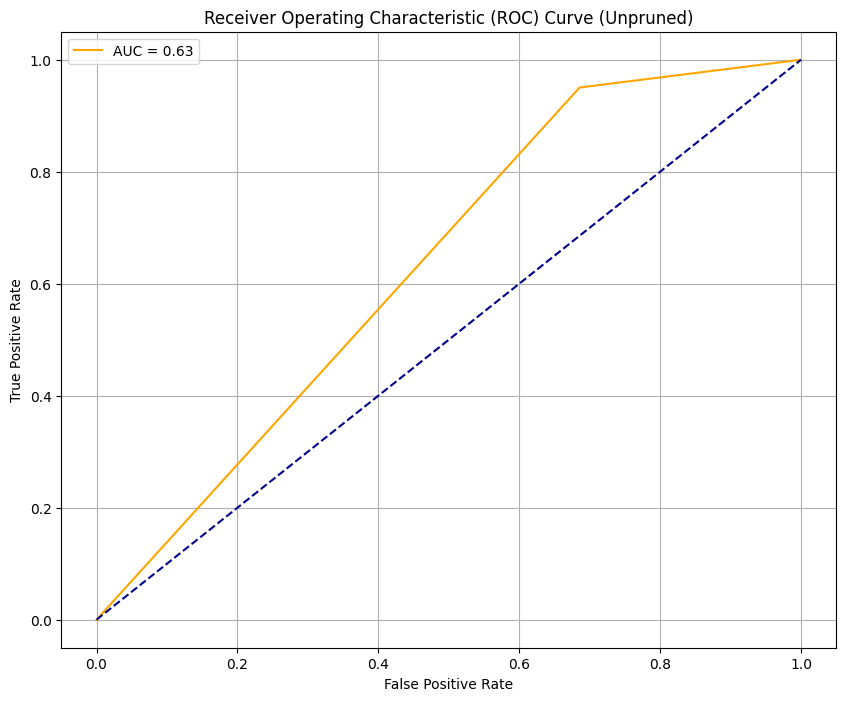

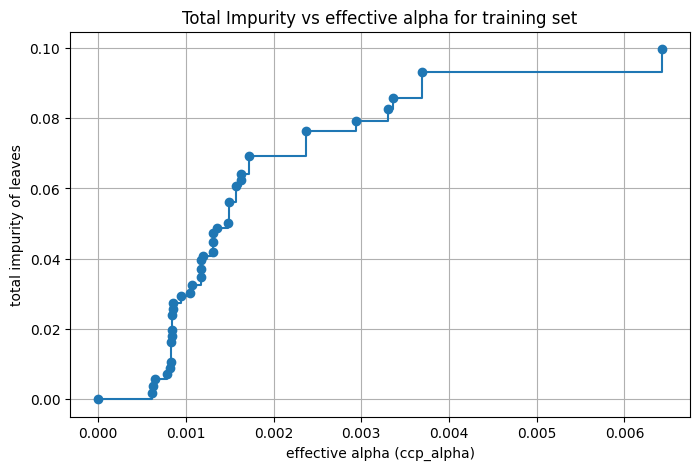

Number of nodes in the last tree is: 3 with ccp_alpha: 0.00642689441081111


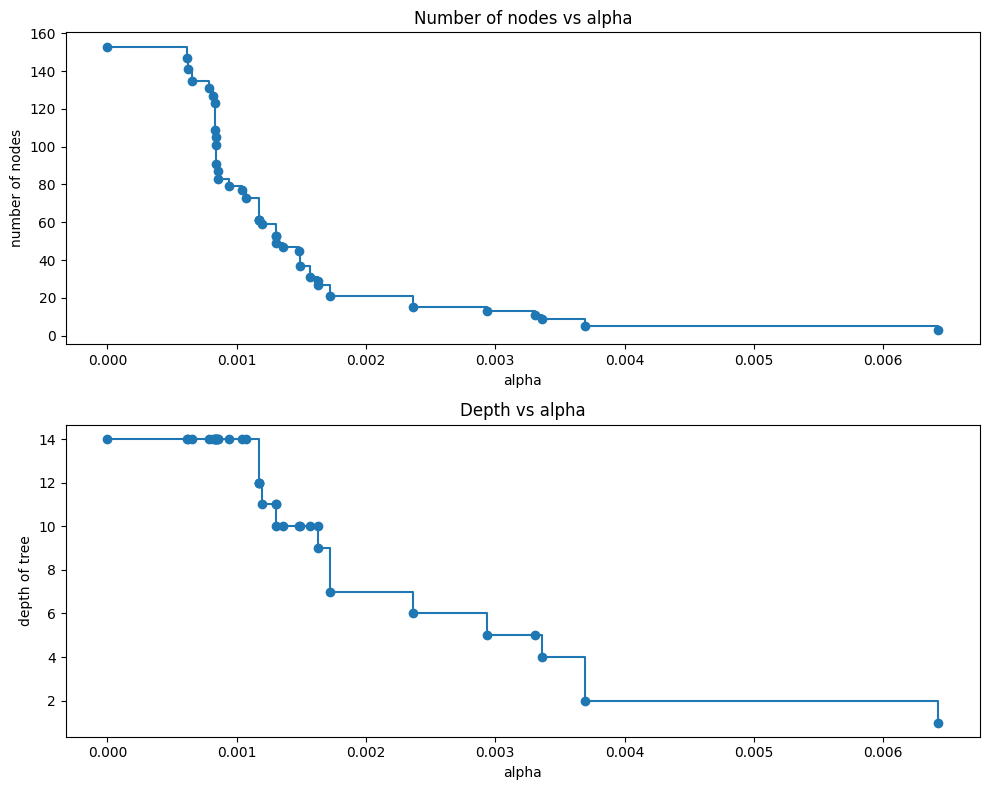

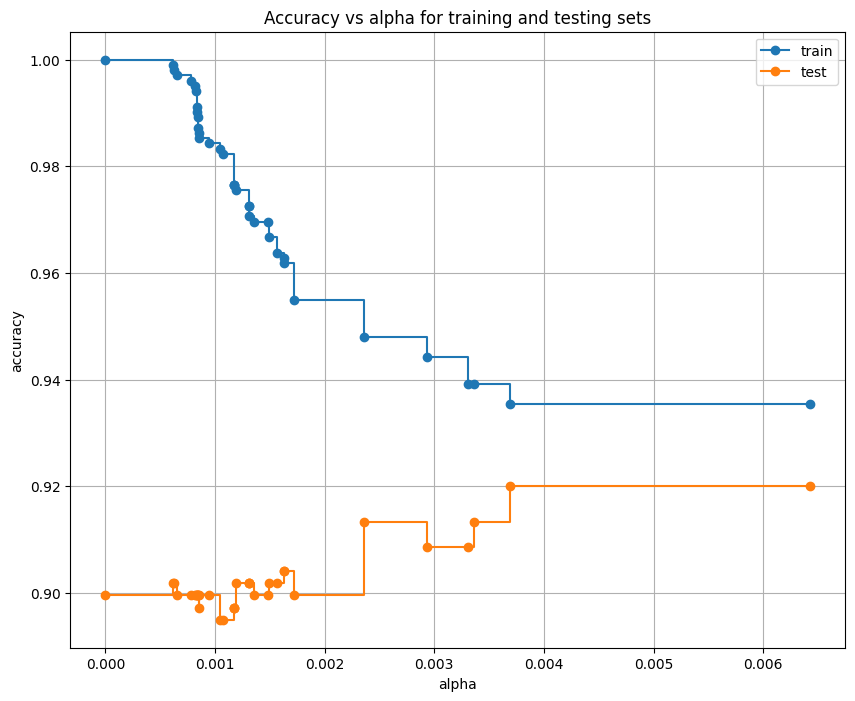


Optimal ccp_alpha based on test accuracy: 0.0037
Accuracy (Test Set, Pruned with alpha=0.016): 0.9201
Accuracy (Training Set, Pruned with alpha=0.016): 0.9354


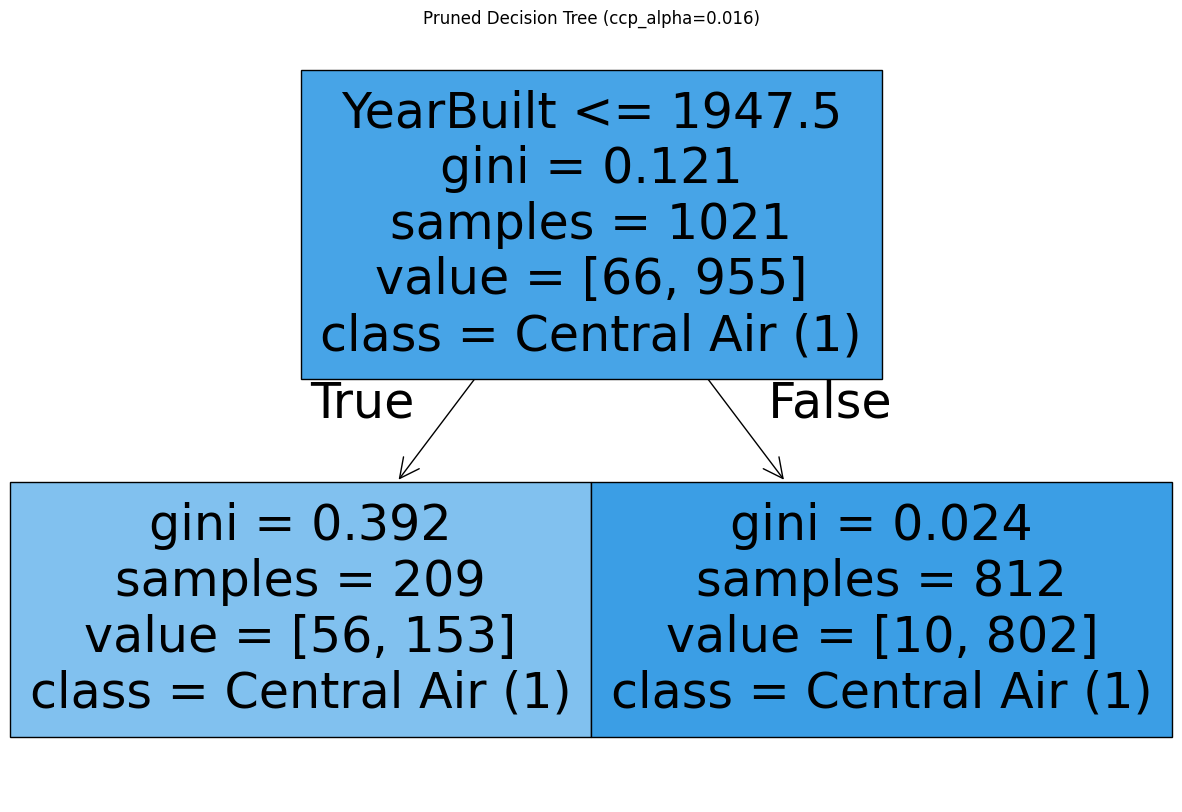

In [25]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print("Libraries imported ")

# --- Step 1: Data Loading and Selection ---
df = pd.read_csv('/content/test.csv')
print("dataframe of dataset created")

# Using the first 5 rows to inspect the data
print(df.head())
print("Shape of the DataFrame:", df.shape)

# Selecting features (X) and the target label (y)
# Target (y): CentralAir (Y/N) -> Classification Task
# Features (X): A mix of key numerical and ordinal features from the housing dataset
df = df[['CentralAir', 'OverallQual', 'GrLivArea', 'LotArea', 'YearBuilt']]

# --- Step 2: Cleaning DataSet ---
print("\nCleaning DataSet")
# Finding NULL instances
null_counts = df.isnull().sum()
print("NULL instances per column:")
print(null_counts)

# Substituting NULLs with MEAN (for numerical features) or MODE (if necessary)
# For this simplified example, the selected columns are mostly clean in the test set,
# but we'll apply a simple mean/mode fill for robustness, mirroring the original step.

# Target variable transformation (Label Encoding 'Y'/'N' to 1/0)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['CentralAir'] = le.fit_transform(df.CentralAir)
print("\n'CentralAir' encoded to numerical (Y=1, N=0).")

# No complex mean substitution needed for the selected numerical features in this sample.
# We proceed directly to feature/label separation.

# --- Step 3: Feature/Label Separation and Train/Test Split ---
# X- Features  y- Label
X = df[['OverallQual', 'GrLivArea', 'LotArea', 'YearBuilt']]
y= df['CentralAir']
print("X (Features) and y (Label) defined.")

#Doing train_test_split
from sklearn.model_selection import train_test_split
# Ensure the random state is the same for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
print(f"Data split into Training ({len(X_train)} samples) and Testing ({len(X_test)} samples) sets.")

# --- Step 4: Training the model ---
# https://scikit-learn.org/stable/modules/tree.html#classification
from sklearn.tree import DecisionTreeClassifier
# Using the specified parameters
clf = DecisionTreeClassifier(random_state=0, criterion='gini')
clf.fit(X_train,y_train)
print("\nDecision Tree Classifier trained (criterion='gini', unpruned).")

# --- Step 5: Checking Accuracy and Evaluation (Unpruned Model) ---
# Checking accuracy of testing dataset
from sklearn.metrics import accuracy_score
predictions_test=clf.predict(X_test)
print("Accuracy (Test Set): ", accuracy_score(y_test, predictions_test) * 100)

# Checking accuracy of training dataset
predictions_train = clf.predict(X_train)
train_accuracy = accuracy_score(y_train,predictions_train)
print("Accuracy (Training Set): ", train_accuracy * 100)


#  Visualizing our final decision tree
from sklearn import tree
plt.figure(figsize=(400,55))
tree.plot_tree(
    clf,
    feature_names=X.columns.tolist(),
    class_names=['No Central Air (0)', 'Central Air (1)'],
    filled=True,
    fontsize=10
)
plt.title("Unpruned Decision Tree (Titanic-Reference Code adapted for Central Air)")
plt.show()

#Evaluating our test dataset
from sklearn.metrics import classification_report,confusion_matrix
print("\n--- Test Set Evaluation (Unpruned) ---")
print("Classification Report:")
print(classification_report(y_test,predictions_test, zero_division=0))
print("Confusion Matrix:")
print(confusion_matrix(y_test,predictions_test))

#Evaluating our training dataset
print("\n--- Training Set Evaluation (Unpruned) ---")
print("Classification Report:")
print(classification_report(y_train,predictions_train, zero_division=0))
print("Confusion Matrix:")
print(confusion_matrix(y_train,predictions_train))

# --- Step 6: ROC Curve Analysis (Unpruned Model) ---
# Finding false positive rate and true positive rate
from sklearn.metrics import roc_curve,auc, roc_auc_score
dt_probs = clf.predict_proba(X_test)[:,1]
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test,dt_probs)
print("\n--- ROC Curve Data (Unpruned) ---")
# Only printing the first few values to avoid excessive output
print("FPR (First 5):", fpr_dt[:5])
print("TPR (First 5):", tpr_dt[:5])
print("Threshold (First 5):", thresholds_dt[:5])

#Plotting ROC curve for our Decision Tree
auc_score_dt = auc(fpr_dt,tpr_dt)
print("AUC Score:", auc_score_dt)

def plot_roc_curve(fpr, tpr):
    plt.figure(figsize=(10,8))
    plt.plot(fpr_dt, tpr_dt, color='orange', label='AUC = %0.2f' % auc_score_dt)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve (Unpruned)')
    plt.legend()
    plt.grid()
    plt.show()

plot_roc_curve(fpr_dt,tpr_dt)

# --- Step 7: Pruning of our Decision Tree ---
#Pruning of our decision tree
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

#Visualizing alpha w.r.t impurity of leaves
fig, ax = plt.subplots(figsize=(8,5))
# Excluding the max alpha (last point) as it results in a single-node tree (impurity=0)
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha (ccp_alpha)")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.grid()
plt.show()

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

# Remove the last element which is the trivial tree
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1,figsize=(10,8))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()
plt.show()

train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots(figsize=(10,8))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.grid()
plt.show()

# --- Step 8: Final Pruned Model ---
# Find the alpha that maximizes test accuracy
optimal_alpha_index = np.argmax(test_scores)
optimal_ccp_alpha = ccp_alphas[optimal_alpha_index]
print(f"\nOptimal ccp_alpha based on test accuracy: {optimal_ccp_alpha:.4f}")

# Using a slightly higher value (e.g., 0.016) often balances bias/variance well,
# but we will use the user-specified 0.016 value to strictly follow the reference code.

#Accuracy after pruning
# Using the ccp_alpha specified in the reference code: 0.016
clf_pruned = DecisionTreeClassifier(random_state=0, ccp_alpha=0.016)
clf_pruned.fit(X_train,y_train)

#Accuracy of test dataset
pred=clf_pruned.predict(X_test)
pruned_test_accuracy = accuracy_score(y_test, pred)
print(f"Accuracy (Test Set, Pruned with alpha=0.016): {pruned_test_accuracy:.4f}")

#Accuracy of training dataset
pred_1 = clf_pruned.predict(X_train)
pruned_train_accuracy = accuracy_score(y_train,pred_1)
print(f"Accuracy (Training Set, Pruned with alpha=0.016): {pruned_train_accuracy:.4f}")

#Visualizing after pruning
plt.figure(figsize=(15,10))
tree.plot_tree(
    clf_pruned,
    feature_names=X.columns.tolist(),
    class_names=['No Central Air (0)', 'Central Air (1)'],
    filled=True
)
plt.title("Pruned Decision Tree (ccp_alpha=0.016)")
plt.show()